In [1]:
import cv2
import numpy as np
from importnb import Notebook
import matplotlib.pyplot as plt
import numpy.fft as fft
import numpy.matlib

In [6]:
with Notebook(): 
        import utils

In [7]:
img = utils.loadImage('./resources/blu.png', 'gray')

image ./resources/blu.png loaded


In [8]:
def powerlaw_psd(exponent, size):
    r_samples = (fft.fftfreq(size[0])).T
    c_samples = fft.fftfreq(size[1])
    u = numpy.matlib.repmat(r_samples, size[1], 1).T
    v = numpy.matlib.repmat(c_samples, size[0], 1)
    u[0,0] = v[0,0] = 1
    S_f = np.power(np.power(u,2)+np.power(v,2),0.5)**(exponent)
    S_f[np.abs(S_f)==float('inf')] = 0;
    
    phi = np.random.uniform(size=size)
    x = fft.ifft2(np.multiply(S_f*0.5, (np.cos(2*np.pi*phi)+1j*np.sin(2*np.pi*phi))))
    x = np.real(x)
    return x

In [9]:
noise = powerlaw_psd(-1, img.shape)
out = np.array(img, dtype='float32') + 2000*np.array(noise, dtype='float32')

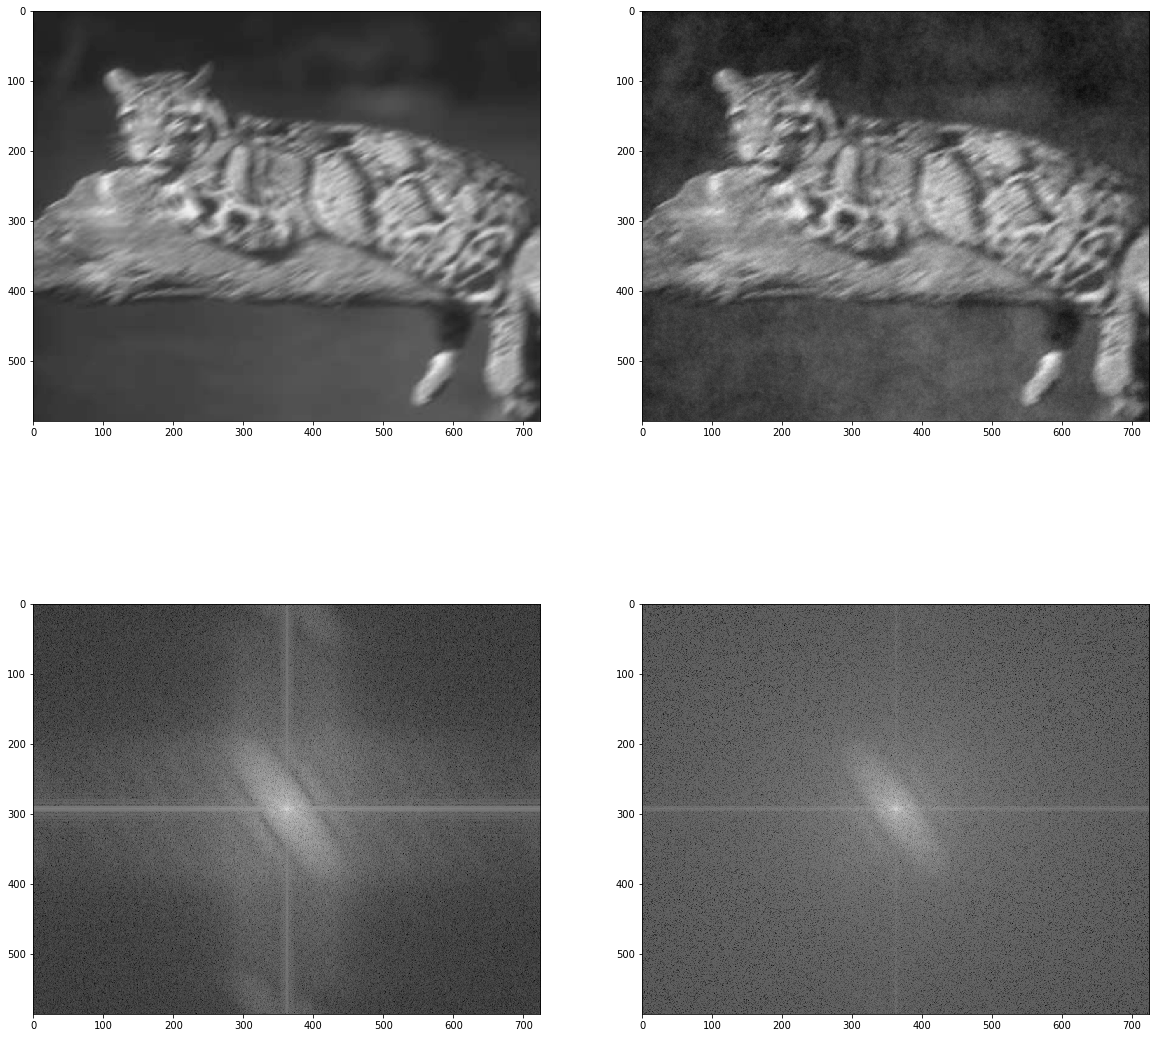

In [10]:
_, plots = plt.subplots(2,2,figsize=(20,20))
plots[0][0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plots[0][1].imshow(out, cmap = 'gray', vmin = 0, vmax = 255)
plots[1][0].imshow(np.log(1+np.abs(np.fft.fftshift(np.fft.fft2(img)))), cmap = 'gray')
plots[1][1].imshow(np.log(1+np.abs(np.fft.fftshift(np.fft.fft2(out)))), cmap = 'gray')

plt.show()